In [1]:
#IMPORTS 

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#Setting default sizes and color for plots
plt.rcParams['figure.facecolor']='white'
plt.rcParams['figure.figsize']=(15,4)

import warnings
warnings.filterwarnings('ignore')

# Load Data

In [2]:
import glob
q = "Data/Chicago/Chicago-Crime_20*.csv"
chunked_files = sorted(glob.glob(q))
#Show Chunked_files
chunked_files[:]

['Data/Chicago/Chicago-Crime_2001.csv',
 'Data/Chicago/Chicago-Crime_2002.csv',
 'Data/Chicago/Chicago-Crime_2003.csv',
 'Data/Chicago/Chicago-Crime_2004.csv',
 'Data/Chicago/Chicago-Crime_2005.csv',
 'Data/Chicago/Chicago-Crime_2006.csv',
 'Data/Chicago/Chicago-Crime_2007.csv',
 'Data/Chicago/Chicago-Crime_2008.csv',
 'Data/Chicago/Chicago-Crime_2009.csv',
 'Data/Chicago/Chicago-Crime_2010.csv',
 'Data/Chicago/Chicago-Crime_2011.csv',
 'Data/Chicago/Chicago-Crime_2012.csv',
 'Data/Chicago/Chicago-Crime_2013.csv',
 'Data/Chicago/Chicago-Crime_2014.csv',
 'Data/Chicago/Chicago-Crime_2015.csv',
 'Data/Chicago/Chicago-Crime_2016.csv',
 'Data/Chicago/Chicago-Crime_2017.csv',
 'Data/Chicago/Chicago-Crime_2018.csv',
 'Data/Chicago/Chicago-Crime_2019.csv',
 'Data/Chicago/Chicago-Crime_2020.csv',
 'Data/Chicago/Chicago-Crime_2021.csv',
 'Data/Chicago/Chicago-Crime_2022.csv',
 'Data/Chicago/Chicago-Crime_2023.csv']

In [3]:
#Combining Files using for-loop way
## Loading all files as df and appending to a list
df_list = []
for file in chunked_files:
    temp_df = pd.read_csv(file)
    df_list.append(temp_df)
    
## Concatenating the list of dfs into 1 combined
df = pd.concat(df_list)
df.head(5)

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
0,1311226,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,1913,19.0,NaN,41.945072,-87.684629
1,1312557,01/01/2001 01:00:00 PM,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,False,513,5.0,NaN,41.695025,-87.620629
2,3206463,01/01/2001 01:00:00 AM,CRIM SEXUAL ASSAULT,PREDATORY,RESIDENCE,False,True,835,8.0,18.0,41.735507,-87.690095
3,1410662,01/01/2001 01:00:00 AM,ASSAULT,SIMPLE,RESIDENCE,False,True,223,2.0,NaN,41.803253,-87.608098
4,1310610,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,1913,19.0,NaN,41.944854,-87.684418


In [4]:
df.iloc[0]

ID                                     1311226
Date                    01/01/2001 01:00:00 AM
Primary Type                   CRIMINAL DAMAGE
Description                         TO VEHICLE
Location Description                    STREET
Arrest                                   False
Domestic                                 False
Beat                                      1913
District                                  19.0
Ward                                       NaN
Latitude                             41.945072
Longitude                           -87.684629
Name: 0, dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7882493 entries, 0 to 169328
Data columns (total 12 columns):
 #   Column                Dtype  
---  ------                -----  
 0   ID                    int64  
 1   Date                  object 
 2   Primary Type          object 
 3   Description           object 
 4   Location Description  object 
 5   Arrest                bool   
 6   Domestic              bool   
 7   Beat                  int64  
 8   District              float64
 9   Ward                  float64
 10  Latitude              float64
 11  Longitude             float64
dtypes: bool(2), float64(4), int64(2), object(4)
memory usage: 676.6+ MB


In [6]:
df['Primary Type'].value_counts()

THEFT                                1663443
BATTERY                              1439779
CRIMINAL DAMAGE                       898650
NARCOTICS                             749383
ASSAULT                               515809
OTHER OFFENSE                         489277
BURGLARY                              427034
MOTOR VEHICLE THEFT                   386112
DECEPTIVE PRACTICE                    351496
ROBBERY                               296266
CRIMINAL TRESPASS                     215940
WEAPONS VIOLATION                     109821
PROSTITUTION                           69910
OFFENSE INVOLVING CHILDREN             56469
PUBLIC PEACE VIOLATION                 52658
SEX OFFENSE                            31306
CRIM SEXUAL ASSAULT                    27583
INTERFERENCE WITH PUBLIC OFFICER       18576
LIQUOR LAW VIOLATION                   14972
GAMBLING                               14623
ARSON                                  13442
HOMICIDE                               12814
CRIMINAL S

# Stakeholder Questions

## Comparing Police Districts


In [7]:
district_cols = ['Primary Type', 'District']
df_districts = df[district_cols].copy()
df_districts.head()

,Primary Type,District
0,CRIMINAL DAMAGE,19.0
1,MOTOR VEHICLE THEFT,5.0
2,CRIM SEXUAL ASSAULT,8.0
3,ASSAULT,2.0
4,CRIMINAL DAMAGE,19.0


In [8]:
df_districts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7882493 entries, 0 to 169328
Data columns (total 2 columns):
 #   Column        Dtype  
---  ------        -----  
 0   Primary Type  object 
 1   District      float64
dtypes: float64(1), object(1)
memory usage: 180.4+ MB


In [9]:
df['District'].value_counts(ascending=False)

8.0     529345
11.0    505232
6.0     460990
7.0     454503
25.0    448079
4.0     447479
3.0     399734
12.0    391405
9.0     384767
2.0     373700
19.0    354632
18.0    354171
5.0     348934
10.0    339663
15.0    336904
1.0     320015
14.0    304678
16.0    264116
22.0    258207
24.0    238533
17.0    227458
20.0    139650
31.0       247
21.0         4
Name: District, dtype: int64

### **Which district has the most crimes? Which has the least?**
    - Most Crimes: District 8 (average number of crimes: 529345)
    - Least Crimes: District 21 ((average number of crimes: 4)

In [10]:
plot_districts = df_districts.groupby('District')['Primary Type'].value_counts().sort_index()
plot_districts

District  Primary Type                     
1.0       ARSON                                  125
          ASSAULT                              15128
          BATTERY                              33870
          BURGLARY                              5340
          CONCEALED CARRY LICENSE VIOLATION       21
                                               ...  
31.0      PUBLIC PEACE VIOLATION                   1
          ROBBERY                                  2
          SEX OFFENSE                              4
          STALKING                                 1
          THEFT                                   46
Name: Primary Type, Length: 755, dtype: int64

In [11]:
## convert to dataframe and reset_index()
plot_districts = plot_districts.to_frame('# of Crimes').reset_index()


In [12]:
crime_district = plot_districts.groupby('District')['# of Crimes'].sum().sort_values(ascending=False)


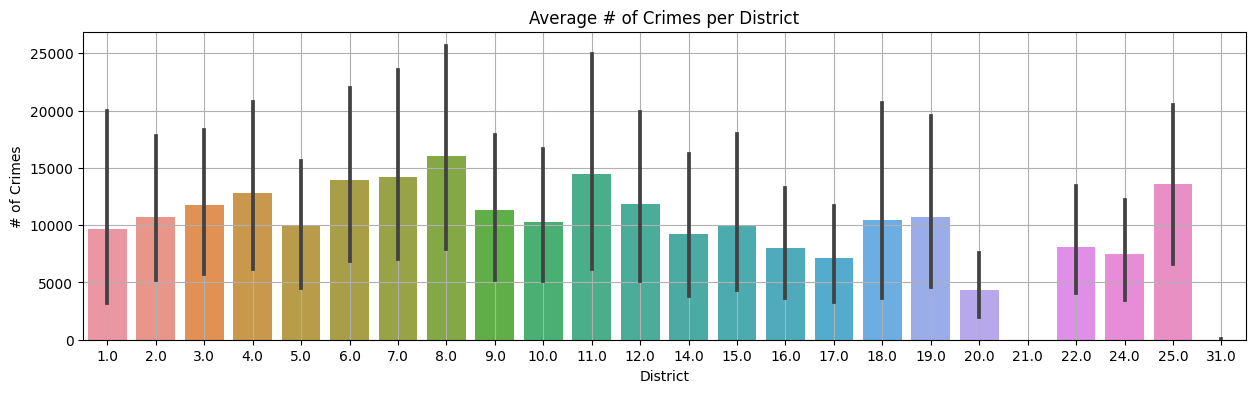

In [13]:
#plotting crime_district

fig, ax = plt.subplots()
sns.barplot(plot_districts, x='District', y='# of Crimes')
ax.set_title("Average # of Crimes per District")
ax.grid();

- The graph above, shows that District 8 seems to have the maximum number of crimes, while District 21 has the least number of crimes.

## Crimes Across the Years

In [22]:
df['Date'].iloc[0]

'01/01/2001 01:00:00 AM'

In [23]:
import matplotlib.dates as mdates
df['Date'] = pd.to_datetime( df['Date'], format='%m/%d/%Y %I:%M:%S %p' )
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7882493 entries, 0 to 169328
Data columns (total 12 columns):
 #   Column                Dtype         
---  ------                -----         
 0   ID                    int64         
 1   Date                  datetime64[ns]
 2   Primary Type          object        
 3   Description           object        
 4   Location Description  object        
 5   Arrest                bool          
 6   Domestic              bool          
 7   Beat                  int64         
 8   District              float64       
 9   Ward                  float64       
 10  Latitude              float64       
 11  Longitude             float64       
dtypes: bool(2), datetime64[ns](1), float64(4), int64(2), object(3)
memory usage: 708.8+ MB


In [24]:
# Create a new 'Year' column
df['Year'] = df['Date'].dt.year
year_cols = ['Primary Type', 'Year']


In [25]:
df_year = df[year_cols].copy()
df_year.head()

,Primary Type,Year
0,CRIMINAL DAMAGE,2001
1,MOTOR VEHICLE THEFT,2001
2,CRIM SEXUAL ASSAULT,2001
3,ASSAULT,2001
4,CRIMINAL DAMAGE,2001


In [26]:
crimes_year = df_year.groupby('Year')['Primary Type'].value_counts().sort_index()
crimes_year

Year  Primary Type                     
2001  ARSON                                 1011
      ASSAULT                              31384
      BATTERY                              93461
      BURGLARY                             26014
      CONCEALED CARRY LICENSE VIOLATION        1
                                           ...  
2023  ROBBERY                               6590
      SEX OFFENSE                            865
      STALKING                               320
      THEFT                                36449
      WEAPONS VIOLATION                     5915
Name: Primary Type, Length: 720, dtype: int64

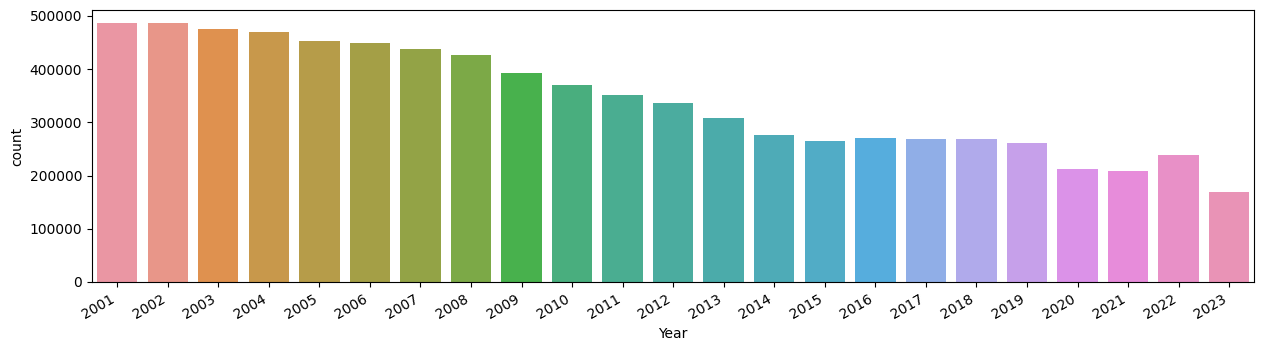

In [27]:
#Visualize number of crimes by year
ax = sns.countplot(df_year, x='Year')
fig = ax.get_figure()
fig.autofmt_xdate();

### Is the total number of crimes increasing or decreasing across the years?
    - The number of crimes are decreasing over the years.

In [28]:
# convert to dataframe and reset_index()
plot_year = crimes_year.to_frame('# of Crimes').reset_index()
plot_year

,Year,Primary Type,# of Crimes
0,2001,ARSON,1011
1,2001,ASSAULT,31384
2,2001,BATTERY,93461
3,2001,BURGLARY,26014
4,2001,CONCEALED CARRY LICENSE VIOLATION,1
...,...,...,...
715,2023,ROBBERY,6590
716,2023,SEX OFFENSE,865
717,2023,STALKING,320
718,2023,THEFT,36449


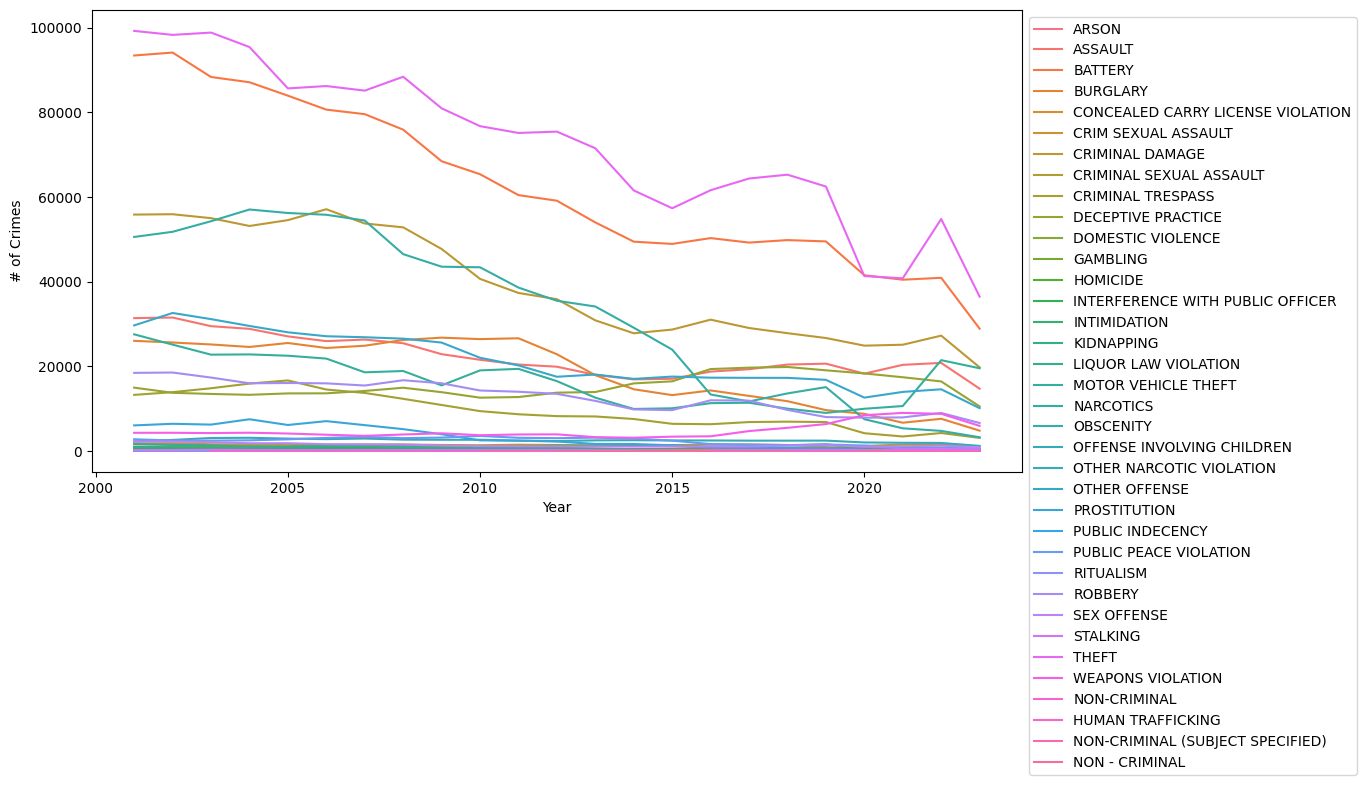

In [29]:
fig, ax = plt.subplots(figsize=(12,6))
sns.lineplot(plot_year, x='Year', y="# of Crimes",markers=True,
                  hue='Primary Type',ax=ax,)
ax.legend(bbox_to_anchor=[1,1]);

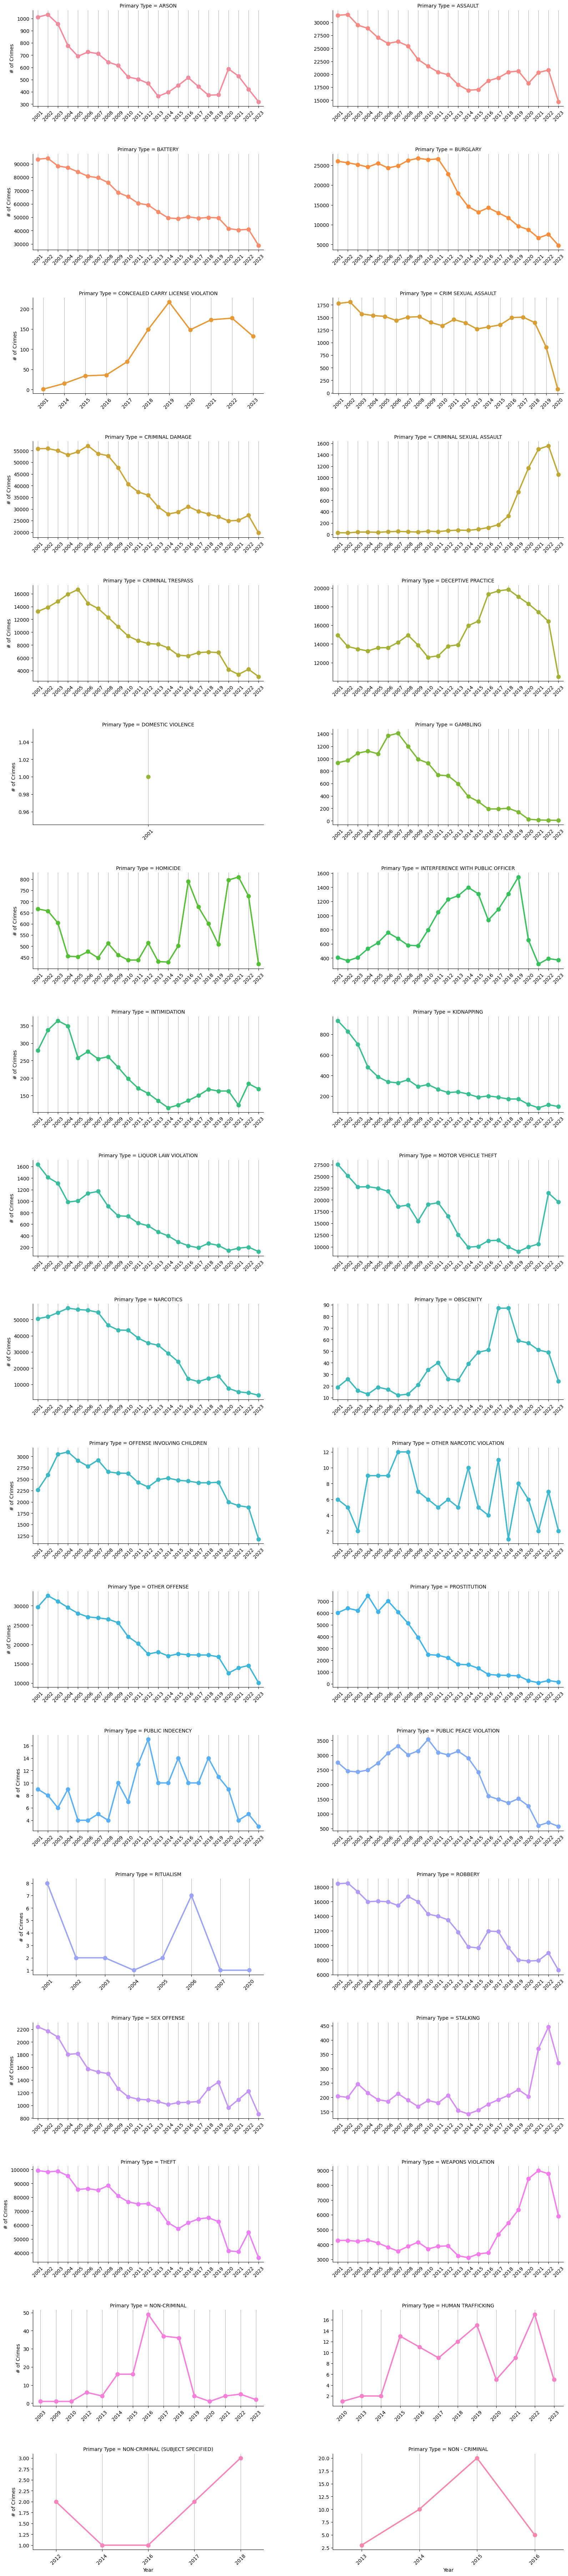

In [30]:
# catplot, which can produce many different kinds of figures
# specify col='Description' to produce a separate subplot for each category in the provided column name.
g = sns.catplot(data=plot_year, x='Year', y='# of Crimes',
                kind='point',aspect=2, height=4,
                hue='Primary Type', col='Primary Type',col_wrap=2,
               sharey=False, sharex=False)
for ax in g.axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    
# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.3, hspace=0.5)
[ax.grid(axis='x') for ax in g.axes];

### Are there any individual crimes that are doing the opposite?
- The previous plot showed that number of crimes have decreased over the years. However, below are individual crimes that have increased:
    - Criminal Sexual Assault
    - Motor Vehicle Theft began to increase since 2020
    - Stalking had increased from 2014-2022
    - Weapons Violation
    


## Comparing Months

In [31]:
df.head(2)

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude,Year
0,1311226,2001-01-01 01:00:00,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,1913,19.0,NaN,41.945072,-87.684629,2001
1,1312557,2001-01-01 13:00:00,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,False,513,5.0,NaN,41.695025,-87.620629,2001


In [32]:
%%timeit
df['datetime'] = pd.to_datetime(df['Date'], format = '%m/%d/%Y %H:%M:%S %p', errors ='coerce')


702 ms ± 99.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [33]:
df.head(2)

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude,Year,datetime
0,1311226,2001-01-01 01:00:00,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,1913,19.0,NaN,41.945072,-87.684629,2001,2001-01-01 01:00:00
1,1312557,2001-01-01 13:00:00,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,False,513,5.0,NaN,41.695025,-87.620629,2001,2001-01-01 13:00:00


In [34]:
# Set the date column as the index
df = df.set_index("datetime")
df.head(2)

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude,Year
datetime,,,,,,,,,,,,,
2001-01-01 01:00:00,1311226,2001-01-01 01:00:00,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,1913,19.0,NaN,41.945072,-87.684629,2001
2001-01-01 13:00:00,1312557,2001-01-01 13:00:00,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,False,513,5.0,NaN,41.695025,-87.620629,2001


### What months have the most crime? What months have the least?
    - Most Crimes: July
    - Least Crimes: February
    

In [35]:
keep_cols = ["Primary Type"]

df_datetime = df[keep_cols].copy()
df_datetime.head()

,Primary Type
datetime,
2001-01-01 01:00:00,CRIMINAL DAMAGE
2001-01-01 13:00:00,MOTOR VEHICLE THEFT
2001-01-01 01:00:00,CRIM SEXUAL ASSAULT
2001-01-01 01:00:00,ASSAULT
2001-01-01 01:00:00,CRIMINAL DAMAGE


In [36]:
# Grouping by month
df_datetime['Month'] = df_datetime.index.month
df_datetime

,Primary Type,Month
datetime,,
2001-01-01 01:00:00,CRIMINAL DAMAGE,1
2001-01-01 13:00:00,MOTOR VEHICLE THEFT,1
2001-01-01 01:00:00,CRIM SEXUAL ASSAULT,1
2001-01-01 01:00:00,ASSAULT,1
2001-01-01 01:00:00,CRIMINAL DAMAGE,1
...,...,...
2023-08-29 00:00:00,THEFT,8
2023-08-29 00:00:00,MOTOR VEHICLE THEFT,8
2023-08-29 00:00:00,BATTERY,8


In [37]:
# Crimes by month
crimes_month = df_datetime.groupby('Primary Type')['Month'].value_counts().sort_index()
crimes_month

Primary Type       Month
ARSON              1          963
                   2          841
                   3         1140
                   4         1133
                   5         1284
                            ...  
WEAPONS VIOLATION  8        10620
                   9         9435
                   10        9190
                   11        7952
                   12        7401
Name: Month, Length: 415, dtype: int64

In [38]:
crimes_month_df = crimes_month.to_frame('# of Crimes').reset_index()
crimes_month_df.head()

,Primary Type,Month,# of Crimes
0,ARSON,1,963
1,ARSON,2,841
2,ARSON,3,1140
3,ARSON,4,1133
4,ARSON,5,1284


In [39]:
# number of crimes per month
monthly_crimes = crimes_month_df.groupby('Month')['# of Crimes'].sum().sort_index()
monthly_crimes.sort_values(ascending=False)

Month
7     740788
8     731490
5     704928
6     704081
10    676288
9     668250
3     650265
4     647745
1     622217
11    608967
12    579778
2     547696
Name: # of Crimes, dtype: int64

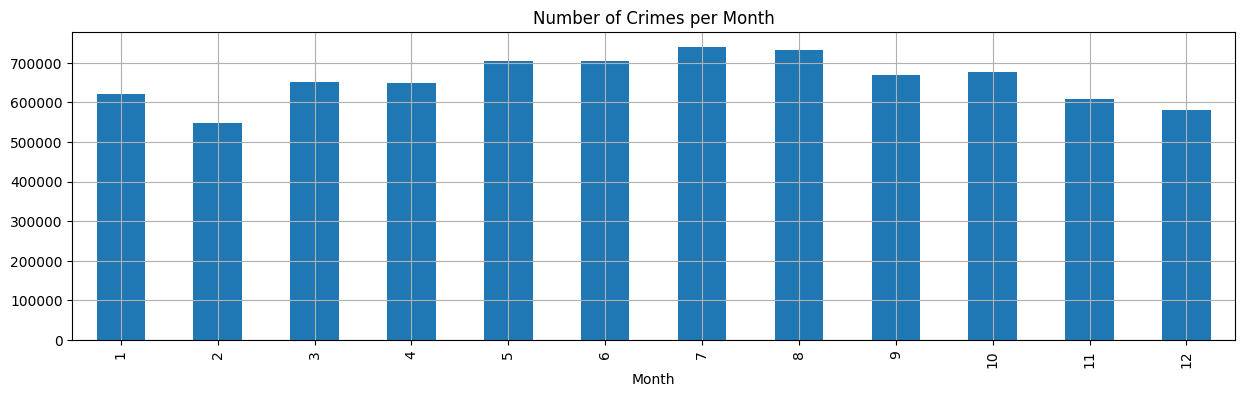

In [40]:
#plotting number of crimes per month
#Visualize number of crimes by year
fig, ax = plt.subplots()
monthly_crimes.plot(kind='bar')
ax.set_title("Number of Crimes per Month")
ax.grid();

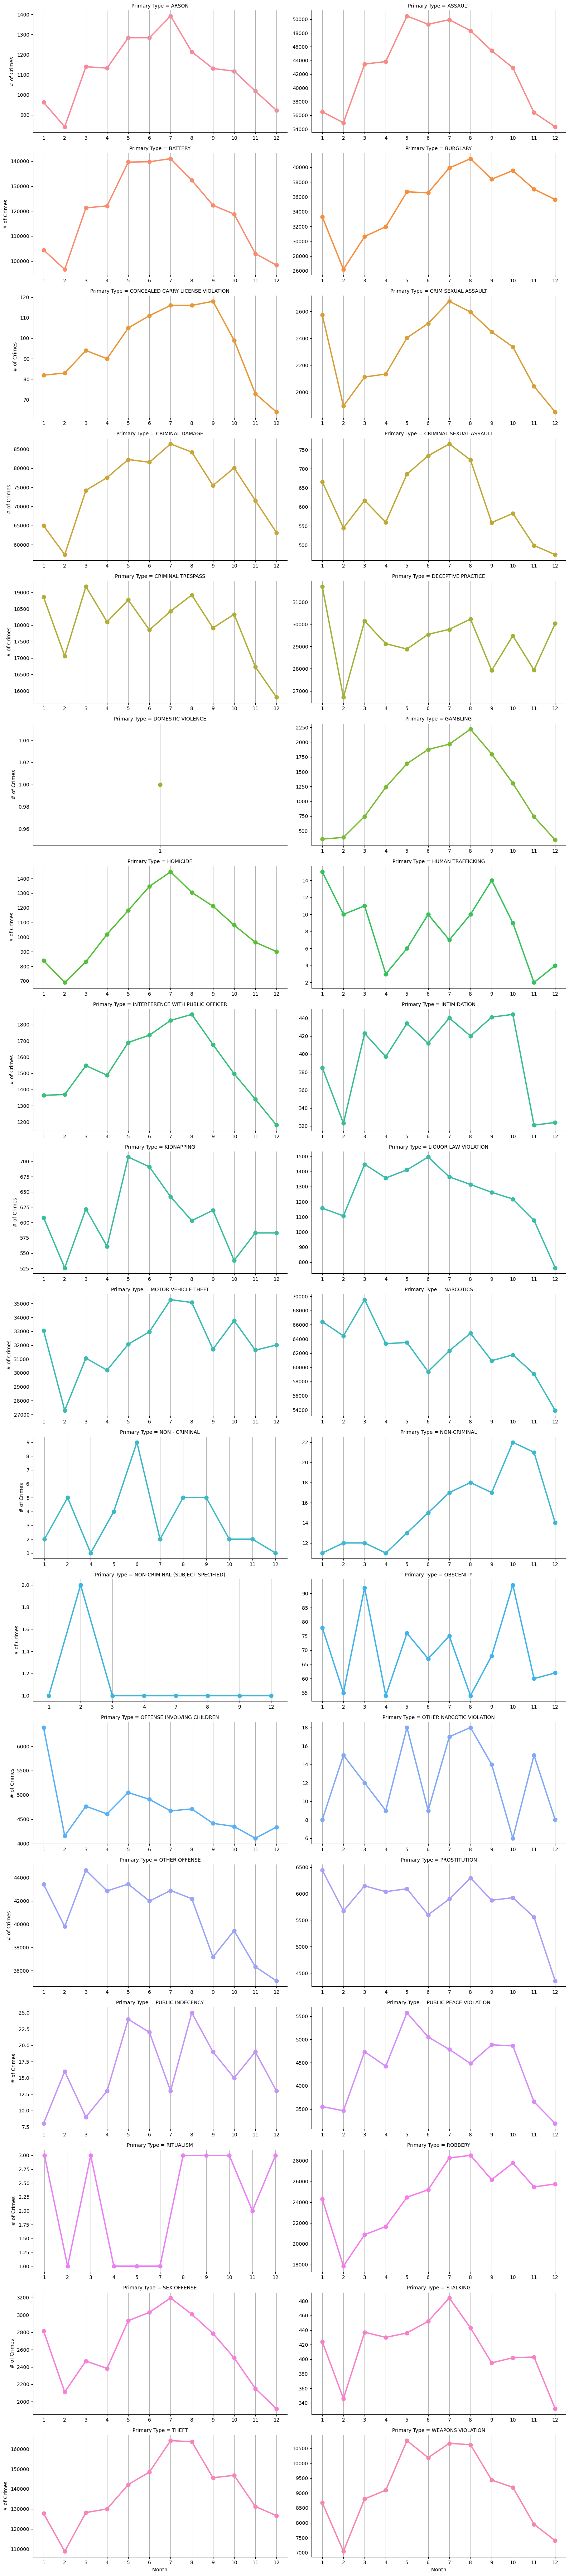

In [41]:
g = sns.catplot(data=crimes_month_df, x='Month', y='# of Crimes',
                kind='point',aspect=2, height=4,
                hue='Primary Type', col='Primary Type',col_wrap=2,
               sharey=False, sharex=False)
[ax.grid(axis='x') for ax in g.axes];

### Are there any individual crimes that do not follow this pattern? If so, which crimes?
    - Assault
    - Concealed Carry License Violation
    - Sexual Assault
    - Trespass
    - Human Trafficking
    - Interference with Public Officer
    - Intimidation
    - Kidnapping
    - Liquor Law Violation
    - Narcotics
    - Obscenity
    - Ritualism
